<a href="https://colab.research.google.com/github/Ismail-Armutcu/Algorithms-for-Interactive-Sytems/blob/main/MMI513_hw1_random_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMI513 HW1 Random Numbers


In [1]:
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt
import sys
from bisect import bisect_left
from itertools import permutations as perms

plt.rcParams['figure.figsize'] = [7.5, 7.5] # This is to adjust the image size on Jupyter

# Linear Congruential Method

- We will first implement the first version of LCG that we discussed in the lecture as ```lgc1()```
- This requires the function ```modulosum()```
- We will pass ```lgc1()``` as a a function handle to ```lcgrandom()``` which will call it to generate random numbers
- We will then follow up on the Las Vegas method which uses ```lgc1()```
- ```lgc1()``` is also used in ```randomunit()``` to generate uniformly distributed random (floating-point) numbers in $[0,1)$
- Finally, we will implement the spectral test to see how LCG behaves

In [4]:
def modulosum(x, y, m):
    assert (x >= 0 and y >= 0)
    assert (x <= m-1 and y <= m-1)
    assert (type(x)==int)
    assert (type(y)==int)
    assert (type(m)==int)

    if (x <= m - 1 - y):
        return x + y
    else:
        return x- (m - y)

def lcg1(modulus=2**31-1, multiplier=16807, increment=0, startingval=1):
    # Check conditions
    assert (modulus>=1)
    assert (multiplier >=0 and increment >=0 and startingval >= 0)
    assert (multiplier <= modulus-1 and increment <= modulus-1 and startingval <= modulus-1)
    assert (multiplier <= sys.maxsize/(modulus-1))
    # Algorithm 1
    r = (multiplier * startingval) % modulus
    r = modulosum(r, increment, modulus)
    return r

def lcgrandom(fun=lcg1, modulus=2**32-1, multiplier=367, increment=314, initval=1, num=1):
    # Check conditions
    assert(fun==lcg1 or fun==lcg2)
    randlist = []; # Create an empty list to populate
    for ind in range(num):
        val = fun(modulus, multiplier, increment, initval)
        initval = val # Set the previous random number as the new seed
        randlist.append(val) # Append to the list
    return np.array(randlist)

def randomunit(fun=lcg1, modulus=2**31-1, multiplier=16807, increment=0, initval=1):
    rnd = lcg1(modulus, multiplier, increment, initval)
    return (rnd*1.)/modulus, rnd

def spectraltest(modulus=256, multiplier=21, increment=11, startingval=0, num=512, t=2):
    randlist = lcgrandom(lcg1, modulus, multiplier, increment, startingval, num)
    x = randlist[0::2]
    y = randlist[1::2]
    plt.plot(x, y, 'b.')
    plt.axis('square')
    plt.axis('tight')
    plt.show()
    return 0


## **Testing code** ✅

- Let us now test the LCG and Las Vegas methods that we implemented by generating some random numbers

In [5]:
#@title Testing LGC and Las Vegas methods {run: "auto"}
numran = 100 #@param {type:"number"}
ival = 11 #@param {type:"number"}
lbound = 0 #@param {type:"number"}
ubound = 600 #@param {type:"number"}

rlist = lcgrandom(lcg1, num=numran)
print('\nRandom numbers generated by LCG\n')
print(rlist)

print('\nRandom numbers generated by the Las Vegas Algorithm\n')
rlist, _ = lasvegasrandom(initval=ival, lowerbound=lbound, upperbound=ubound, num=numran)
print(rlist)


Random numbers generated by LCG

[       681     250241   91838761 3640054536  165186281  493823311
  844529061  704520461  860971801 2444038746 3609022736 1661417566
 4149858441 2579625731 1829838691 1535901891 1035278666 1990148776
  240160956 2239725266 1640419591  738568911  471851066 1370649736
  517279911  863166671 3249556036 2881124811  810851381 1229713786
  333393801 2096441021  594709216 3509917836 3944624921  273367906
 1541774031 3190354046 2628830956 2708287086 1803915731  612110161
 1306130061 2608362956 3786465676 2358467121 2269007426 3797037721
 1943440341  278034491 3254410726  367828746 1849163951   38337721
 1185042036 1118730731 2552285566  385932726 4198357316 3198843676
 1449557871 3706761686 3171873856  141568521  416039981 2362818016
 3865785891 1404214961 4245782896 3424162356 2537134826 3415545736
 3669802581 2492784206   23770081  133685451 1817920586 1456924651
 2115402651 3258660131 1927360381 2966623761 2124194966 2190472441
  744501996 2649293261 16280

- Let us now run the spectral test and see how LCG behaves

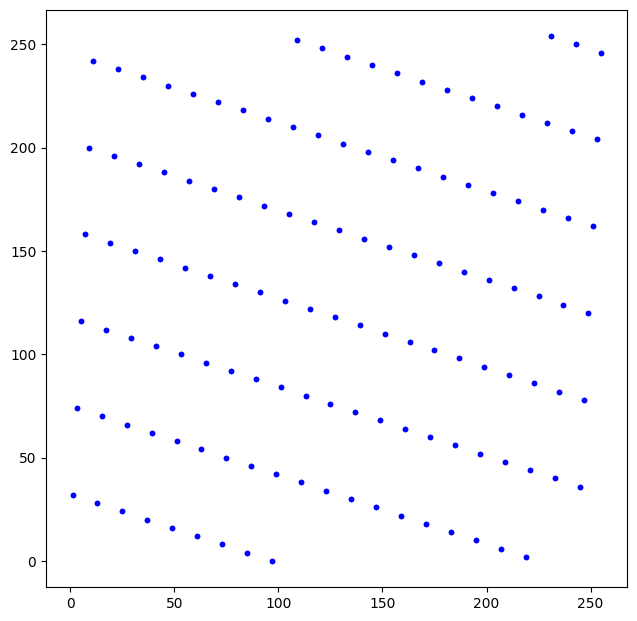

0

In [6]:
spectraltest()

In [8]:
def randompoisson(mu=10., initstate=2^13-1):
    t = np.exp(-mu) # Termination limit value (e.g. P(X=0) given mu, i.e. c=0)
    n = -1 #
    p = 1 # Probability of 1
    while True:
        n += 1 # At least zero occurrence
        rnd, initstate = randomunit(lcg1, 2**31-1, 16807, 0, initstate) # We have to update the initstate every time we execute this function
        p *= rnd # Calculate the probability of the multiple subsequent independent events occuring
        if p <= t: # Probability less than the minimum permissible value break, otherwise generate more events
            break
    return n, initstate

def poissonevents(mu=10., num=1000, initstate=2^13-1):
    rndlist = []
    for ind in range(num):
        n, initstate = randompoisson(mu, initstate)
        rndlist.append(n)
    return np.array(rndlist)

## **Testing code** ✅

- Let us now test the our code by first generating Poisson numbers
- We will define initstate in a separate cell since it will be updated by our function.
- Try running the cell containing ```randompoisson()``` several times and with different values for ```mupoi``` as well

In [9]:
initstate = 2^13-1

In [10]:
#@title Generating a Poisson Number {run: "auto"}
mupoi = 60 #@param {type:"number"}
n, initstate = randompoisson(mu=mupoi, initstate = initstate)
print(n)

54


- Let us now generate some Poisson events

# **PROGRAMMING ASSIGNMENT #1**
## **Spring 2023/24 Semester**

- Implement the second LCG implementation in the book (p. 27 in the 2017 edition) as ```lcg2()``` and show that it works as intended using the ```spectraltest()``` function.
- Implement a ```randomwalk()``` function that generates a random walk of length `n`. A random walk is a sequence of steps taken in random directions. Each step can be either `1` or `-1`, representing a step to the right or left, respectively. The random walk should start at `0`.
  - If the next value generated by LCG is greater than the previous value the next step will be `+1`, otherwise `-1`.
  - The program should print out the random walk as a Python list as well as the final position of the random walk:
  ```python
  >> randomwalk(10)
  Random walk: [-1, -1, 1, 1, 1, 1, -1, 1, 1, 1]
  Final position: 4
  ```

The program should ask the user for the length of the random walk (n), and then generate the sequence of steps for the random walk.

**GRADING:**
1. lcg2() function works with default arguments (30/100)
2. randomwalk() function works with default arguments (30/100)
2. Code carries out necessary checks on inputs via proper assertions (20/100)
3. Code is properly commented, explained and documented (20/100)

**Notes:**
1. You are free to use chatGPT for help, you should not use code generated by chatGPT directly and you should mention which part of the code is chatGPT it in the comments. Your code will be checked for verbatim copying from chatGPT.
2. You are not allowed to use external modules/libraries in your implementations, but you can use them for testing your code.
3. You will upload your submission as a Python notebook to ODTUClass.


(c) Huseyin Hacihabiboglu, 2022-2024